## import stuff

In [4]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import chi2
from scipy.stats import pearsonr
from scipy.stats import ttest_ind_from_stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from collections import OrderedDict
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5

## Import data

In [12]:
CH65_all_unf = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220601_CH65_unfilt.csv',delimiter=',',dtype={'geno': str}))
CH65_all_fil = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220601_CH65_filt.csv',delimiter=',',dtype={'geno': str}))

CH65_all_unf.head()

,geno,repa_x,repb_x,MA90_mean,MA90_sem,repa_y,repb_y,SI06_mean,SI06_sem,repa,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.612721,8.472320,8.542521,0.040530,5.0,5.0,5.0,2.282060e-14,6.651893,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.631980,8.516378,8.574179,0.033371,5.0,5.0,5.0,0.000000e+00,5.000000,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.340245,8.290790,8.315518,0.014276,5.0,5.0,5.0,0.000000e+00,5.000000,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.511183,8.436571,8.473877,0.021539,5.0,5.0,5.0,1.341254e-11,6.415592,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.552056,8.523392,8.537724,0.008275,5.0,5.0,5.0,3.854462e-15,6.039586,...,0,0,0,0,0,0,1,0,0,1


## Check out correlation between replicates without filtering

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.9815221924229878


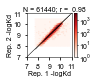

In [7]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_unf[['repa_x', 'repb_x']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa_x'], plotting['repb_x'],cmap='Reds',bins='log',gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([7,8,9,10,11])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['7','8','9','10','11'])
y_locator = FixedLocator([7,8,9,10,11])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['7','8','9','10','11'])
plt.xlim(7,11)
plt.ylim(7,11)
x = plotting['repa_x']
y = plotting['repb_x']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([7,11])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa_x'], plotting['repb_x'])
m, b = np.polyfit(plotting['repa_x'], plotting['repb_x'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('MA90_unfilt_rep_correl.png',transparent=True, dpi=600,bbox_inches='tight')

0.9835117737379467


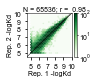

In [10]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_unf[['repa_y', 'repb_y']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa_y'], plotting['repb_y'],cmap='Greens',bins='log',vmin=1, vmax=100,gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([5,6,7,8,9,10])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['5','6','7','8','9','10'])
y_locator = FixedLocator([5,6,7,8,9,10])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['5','6','7','8','9','10'])
plt.xlim(4.5,10)
plt.ylim(4.5,10)
x = plotting['repa_y']
y = plotting['repb_y']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([4.5,10])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa_y'], plotting['repb_y'])
m, b = np.polyfit(plotting['repa_y'], plotting['repb_y'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('SI06_unfilt_rep_correl.png',transparent=True, dpi=600,bbox_inches='tight')

0.8252924946684672


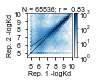

In [11]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_unf[['repa', 'repb']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa'], plotting['repb'],cmap='Blues',bins='log',vmin=1, vmax=1000,gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([5,6,7,8,9,10])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['5','6','7','8','9','10'])
y_locator = FixedLocator([5,6,7,8,9,10])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['5','6','7','8','9','10'])
plt.xlim(4.5,10)
plt.ylim(4.5,10)
x = plotting['repa']
y = plotting['repb']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([4.5,10])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa'], plotting['repb'])
m, b = np.polyfit(plotting['repa'], plotting['repb'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('G189E_unfilt_rep_correl.png',transparent=True, dpi=600,bbox_inches='tight')

0.9824940147473318


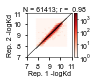

In [14]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_fil[['repa_x', 'repb_x']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa_x'], plotting['repb_x'],cmap='Reds',bins='log',gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([7,8,9,10,11])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['7','8','9','10','11'])
y_locator = FixedLocator([7,8,9,10,11])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['7','8','9','10','11'])
plt.xlim(7,11)
plt.ylim(7,11)
x = plotting['repa_x']
y = plotting['repb_x']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([7,11])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa_x'], plotting['repb_x'])
m, b = np.polyfit(plotting['repa_x'], plotting['repb_x'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('MA90_filt_rep_correl.png',transparent=False, dpi=600,bbox_inches='tight')

0.9850926258180197


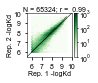

In [15]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_fil[['repa_y', 'repb_y']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa_y'], plotting['repb_y'],cmap='Greens',bins='log',vmin=1,vmax=1000,gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([6,7,8,9,10])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['6','7','8','9','10'])
y_locator = FixedLocator([6,7,8,9,10])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['6','7','8','9','10'])
plt.xlim(5.5,10)
plt.ylim(5.5,10)
x = plotting['repa_y']
y = plotting['repb_y']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([5.5,10])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa_y'], plotting['repb_y'])
m, b = np.polyfit(plotting['repa_y'], plotting['repb_y'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('SI06_filt_rep_correl.png',transparent=False, dpi=600,bbox_inches='tight')

0.9670518121273911


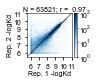

In [16]:
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = pd.DataFrame()
plotting = CH65_all_fil[['repa', 'repb']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['repa'], plotting['repb'],cmap='Blues',bins='log',vmin=1,vmax=1000,gridsize=25,linewidths=0.2)
plt.xlabel("Rep. 1 -logKd",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 -logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x_locator = FixedLocator([6,7,8,9,10,11])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['6','7','8','9','10','11'])
y_locator = FixedLocator([6,7,8,9,10,11])
ax.yaxis.set_major_locator(x_locator)
ax.set_yticklabels(['6','7','8','9','10','11'])
plt.xlim(5.5,11)
plt.ylim(5.5,11)
x = plotting['repa']
y = plotting['repb']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000,10000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([5.5,11])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['repa'], plotting['repb'])
m, b = np.polyfit(plotting['repa'], plotting['repb'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.suptitle("N = "+str(plotting.shape[0])+'; r =  %.2f' % corr,fontsize=7,y=1)
plt.savefig('G189E_filt_rep_correl.png',transparent=False, dpi=600,bbox_inches='tight')